**사례1 : 필기체 숫자 인식**

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [2]:
train_images.shape
len(train_labels)
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
test_images.shape
len(test_labels)
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

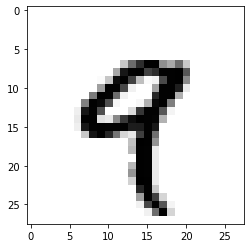

In [4]:
digit = train_images[4]

import matplotlib.pyplot as plt 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [5]:
from keras import models
from keras import layers

# Network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))



In [6]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255


In [7]:
#Keras is now fully intregrated into Tensorflow. So, importing only Keras causes error.
#from keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


In [8]:
network.compile(optimizer='rmsprop', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2599 - accuracy: 0.9247
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1053 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0705 - accuracy: 0.9785
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0516 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0382 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0299 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0178 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0132 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0105 - accuracy

정확도가 ppt자료에 있는 숫자와 다르게 나타나는 이유는 학습 데이터셋에서 무작위로 선택된 128개의 데이터로 구성된 "배치(batch)"를 가져옵니다. 무작위 데이터의 작은 배치를 사용하는 방법을 학률적 학습(stochastic training)이라고 부르는데 이는 확률적 경사 하강법 입니다. 이상적으로는 학습의 매 단계마다 전체 데이터를 사용하고 싶지만, 그렇게 하면 작업이 무거워집니다. 따라서 그 대신에 매번 서로 다른 부분 집합을 사용하는 것이 그 이유입니다. 이렇게 하면 작업 내용은 가벼워지지만 전체 데이터를 쓸 때의 이점은 거의 다 얻을 수 있기 때문입니다.

**사례 2: IMDB 영화평 긍정/부정 분류**

In [9]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)


In [10]:
word_index = imdb.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review =' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [11]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
	results = np.zeros((len(sequences), dimension)) 
	for i, sequence in enumerate(sequences): 
		results[i, sequence] = 1. 
	return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
	metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/6
49/49 [==============================] - 2s 33ms/step - loss: 0.4354 - accuracy: 0.8265
Epoch 2/6
49/49 [==============================] - 1s 30ms/step - loss: 0.2512 - accuracy: 0.9097
Epoch 3/6
49/49 [==============================] - 1s 30ms/step - loss: 0.1959 - accuracy: 0.9290
Epoch 4/6
49/49 [==============================] - 1s 27ms/step - loss: 0.1653 - accuracy: 0.9408
Epoch 5/6
49/49 [==============================] - 1s 27ms/step - loss: 0.1438 - accuracy: 0.9495
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.3346 - accuracy: 0.8757


In [14]:
x_val = x_train[:10000]
y_val = y_train[:10000]
result_model = model.fit(x_train, y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/6
49/49 [==============================] - 2s 47ms/step - loss: 0.1120 - accuracy: 0.9616 - val_loss: 0.0902 - val_accuracy: 0.9732
Epoch 2/6
49/49 [==============================] - 2s 33ms/step - loss: 0.1024 - accuracy: 0.9664 - val_loss: 0.0788 - val_accuracy: 0.9773
Epoch 3/6
49/49 [==============================] - 2s 40ms/step - loss: 0.0910 - accuracy: 0.9695 - val_loss: 0.0728 - val_accuracy: 0.9786
Epoch 4/6
49/49 [==============================] - 2s 43ms/step - loss: 0.0825 - accuracy: 0.9728 - val_loss: 0.0593 - val_accuracy: 0.9842
Epoch 5/6
49/49 [==============================] - 2s 40ms/step - loss: 0.0726 - accuracy: 0.9764 - val_loss: 0.0575 - val_accuracy: 0.9844
Epoch 6/6
49/49 [==============================] - 2s 40ms/step - loss: 0.0676 - accuracy: 0.9772 - val_loss: 0.0587 - val_accuracy: 0.9819


위에서 model.fit()메서드는 result_model객체를 반환합니다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있습니다.

In [15]:
history_dict = result_model.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

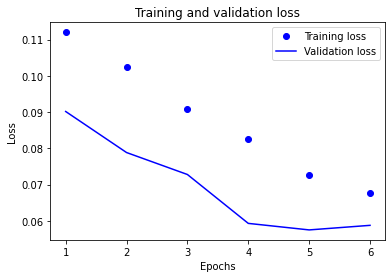

In [16]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

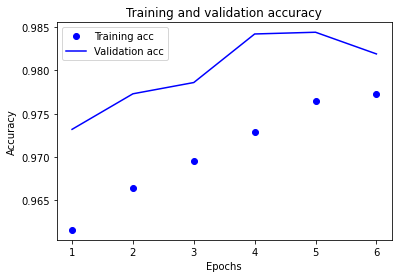

In [17]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 위에 그래프에서 볼 수 있듯이 훈련 손실이 epoch마다 감소하고 훈련 정확도는 에포크마다 증가합니다.
경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로 입니다. epochs가 6일때부터 그래프가 역전되는것을 볼 수 있습니다.
이는 훈련 데이터가 과대적합되었음을 알 수 있습니다. 그러므로 과대 적합을 방지하기위해 과대 적합을 완화하는 방법을 사용 또는 처음부터 epoch을 5까지만 훈련하고 테스트 데이터에서 평가하는 방법을 사용해야 합니다.